## 1. Загрузить данные для обучения

In [ ]:
import pandas as pd

Основную вычислительную нагрузку берёт на себя модуль **Numpy**, с помощью которого можно быстро производить
вычисления сразу над массивами чисел.

In [ ]:
import numpy as np

In [ ]:

from sklearn.metrics import roc_curve,  auc # метрики качества
from sklearn.metrics import confusion_matrix # метрики качества


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid') # установить стиль whitegrid, другие стили можно найти в документации к seaborn

In [ ]:
import warnings
warnings.filterwarnings("ignore")

<br/>

In [ ]:
%%capture
!wget https://www.dropbox.com/s/io67uppgq66plbp/training_data.csv
!wget https://www.dropbox.com/s/2ga9maqxbsf8xhg/test_data.csv

In [ ]:
training_data = pd.read_csv('training_data.csv')

Посмотрим на 10 случайно выбранных записей из обучающего набора, для этого будем использовать функцию **sample()**. Параметр
**random_state=123** фиксирует "случайность", то есть на любом компьютере метод **sample()** будет работать одинаково. 

In [ ]:
training_data.sample(10, random_state=123)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
11872,0,0.336531,66,0,0.517186,10589.0,9,0,4,0,0.0
40828,0,0.017424,40,0,0.376570,6051.0,11,0,2,0,1.0
36400,0,0.079785,42,0,0.786468,6916.0,9,0,3,0,1.0
5166,0,0.000349,50,1,0.340891,11070.0,7,0,2,0,0.0
30273,0,1.000714,31,0,0.594670,1800.0,6,0,0,0,1.0
31249,0,0.071795,42,0,1586.000000,NaN,4,0,2,0,NaN
21872,0,0.274562,52,0,0.226425,14538.0,17,0,2,0,1.0
47728,0,0.006529,82,0,7.000000,NaN,6,0,0,0,0.0
7261,0,0.018731,64,0,0.076228,7083.0,13,0,0,0,0.0
6456,0,0.393872,36,2,0.276135,2400.0,5,0,0,1,1.0


In [ ]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,50000.0,0.066860,0.249782,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,50000.0,7.927880,332.393142,0.0,0.030096,0.154426,0.555651,50708.0
age,50000.0,52.240520,14.766593,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,50000.0,0.428220,4.269296,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,50000.0,352.441921,2006.426016,0.0,0.176304,0.366811,0.862599,329664.0
MonthlyIncome,40147.0,6642.232222,18122.708690,0.0,3400.000000,5400.000000,8250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,50000.0,8.476040,5.172756,0.0,5.000000,8.000000,11.000000,57.0
NumberOfTimes90DaysLate,50000.0,0.269920,4.243110,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,50000.0,1.017500,1.120151,0.0,0.000000,1.000000,2.000000,32.0
NumberOfTime60-89DaysPastDueNotWorse,50000.0,0.246040,4.231055,0.0,0.000000,0.000000,0.000000,98.0


# 2. Предобработка данных

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      50000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  50000 non-null  float64
 2   age                                   50000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  50000 non-null  int64  
 4   DebtRatio                             50000 non-null  float64
 5   MonthlyIncome                         40147 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       50000 non-null  int64  
 7   NumberOfTimes90DaysLate               50000 non-null  int64  
 8   NumberRealEstateLoansOrLines          50000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  50000 non-null  int64  
 10  NumberOfDependents                    48667 non-null  float64
dtypes: float64(4), 

In [ ]:
train_mean = training_data.mean()
train_mean

SeriousDlqin2yrs                           0.066860
RevolvingUtilizationOfUnsecuredLines       7.927880
age                                       52.240520
NumberOfTime30-59DaysPastDueNotWorse       0.428220
DebtRatio                                352.441921
MonthlyIncome                           6642.232222
NumberOfOpenCreditLinesAndLoans            8.476040
NumberOfTimes90DaysLate                    0.269920
NumberRealEstateLoansOrLines               1.017500
NumberOfTime60-89DaysPastDueNotWorse       0.246040
NumberOfDependents                         0.756180
dtype: float64

In [ ]:
training_data.fillna(train_mean, inplace=True)

In [ ]:
training_data['SeriousDlqin2yrs'].value_counts()

0    46657
1     3343
Name: SeriousDlqin2yrs, dtype: int64

Нам нужно выделить в отдельную переменную *training_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. 

In [ ]:
training_values = training_data['SeriousDlqin2yrs']

Проверим размерность целевой переменной

In [ ]:
training_values.shape

(50000,)

In [ ]:
training_points = training_data.drop('SeriousDlqin2yrs', axis=1)

In [ ]:
training_data.shape

(50000, 11)

In [ ]:
training_points.shape

(50000, 10)

##   3. Обучение модели на трейне

In [ ]:
logistic_regression_model = linear_model.LogisticRegression(C=2) # создаем модель

In [ ]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=50)

In [ ]:
logistic_regression_model.fit(training_points, training_values)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
random_forest_model.fit(training_points, training_values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

* Для двух разных моделей в sklearn методы для обучения модели не отличаются.
* Мы получили две обученные модели. 
* Теперь необходимо провалидировать модели на новых тестовых данных, которые не использовались при обучении модели.

## 4. Проверка метрик качества моделей на тесте

In [ ]:
test_data = pd.read_csv('test_data.csv')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      37500 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  37500 non-null  float64
 2   age                                   37500 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  37500 non-null  int64  
 4   DebtRatio                             37500 non-null  float64
 5   MonthlyIncome                         30044 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       37500 non-null  int64  
 7   NumberOfTimes90DaysLate               37500 non-null  int64  
 8   NumberRealEstateLoansOrLines          37500 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  37500 non-null  int64  
 10  NumberOfDependents                    36521 non-null  float64
dtypes: float64(4), 

In [ ]:
test_data.fillna(train_mean, inplace=True)

In [ ]:
test_values = test_data['SeriousDlqin2yrs']

In [ ]:
test_points = test_data.drop('SeriousDlqin2yrs', axis=1)

In [ ]:
test_points.shape

(37500, 10)

# 5. Валидация модели

In [ ]:
test_predictions_logistic_regression = logistic_regression_model.predict(test_points)

In [ ]:
test_predictions_random_forest = random_forest_model.predict(test_points)

In [ ]:
pd.value_counts(test_predictions_logistic_regression)

0    37400
1      100
dtype: int64

In [ ]:
pd.value_counts(test_predictions_random_forest)

0    36645
1      855
dtype: int64

In [ ]:
logistic_regression_model.score(test_points, test_values)

0.9326666666666666

In [ ]:

random_forest_model.score(test_points, test_values)

0.9334933333333333

In [ ]:
test_data['SeriousDlqin2yrs'].value_counts()

0    34973
1     2527
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
s=34973/(34973+2527)
s

0.9326133333333333

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
logistic_regression_confusion_matrix = confusion_matrix(test_values, test_predictions_logistic_regression)
logistic_regression_confusion_matrix = pd.DataFrame(logistic_regression_confusion_matrix)

logistic_regression_confusion_matrix

,0,1
0,34924,49
1,2476,51


In [ ]:
random_forest_confusion_matrix = confusion_matrix(test_values, test_predictions_random_forest)
random_forest_confusion_matrix = pd.DataFrame(random_forest_confusion_matrix)

random_forest_confusion_matrix

,0,1
0,34562,411
1,2083,444


Разберем полученные значения подробнее:

In [ ]:
test_probabilities = logistic_regression_model.predict_proba(test_points)

Посмотрим на первые пять значений этой матрицу: 

In [ ]:
test_probabilities[:5, :]

array([[0.89039973, 0.10960027],
       [0.71487238, 0.28512762],
       [0.92059058, 0.07940942],
       [0.9007389 , 0.0992611 ],
       [0.9265198 , 0.0734802 ]])

Вероятность принадлежности ко второму классу - во втором столбце матрицы вероятностей.

In [ ]:
test_probabilities = test_probabilities[:, 1]

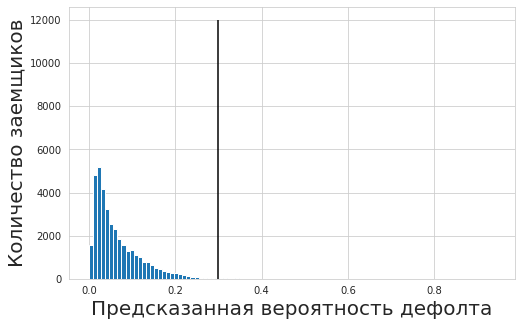

In [ ]:
plt.figure(figsize=(8, 5))

plt.hist(test_probabilities, bins=100)
plt.vlines(0.3, 0, 12000)

plt.xlabel('Предсказанная вероятность дефолта', fontsize=20)
plt.ylabel('Количество заемщиков', fontsize=20);

In [ ]:
higher_thershold = 0.3
alternative_test_predictions = test_probabilities > higher_thershold

In [ ]:
alternative_confusion_matrix = pd.DataFrame(confusion_matrix(test_values, alternative_test_predictions))
alternative_confusion_matrix

,0,1
0,34841,132
1,2417,110


In [ ]:
false_positive_rates, true_positive_rates, threshold = roc_curve(test_values, test_probabilities)

Нарисуем кривую

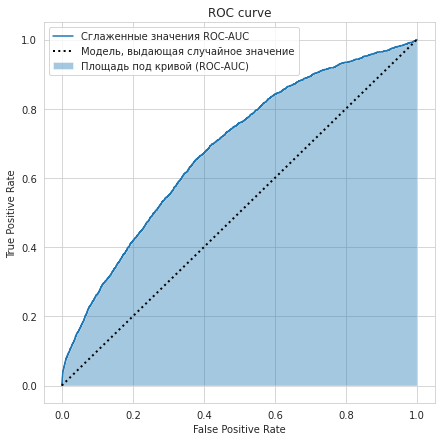

In [ ]:
# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

In [ ]:
roc_auc_value = roc_auc_score(test_values, test_probabilities)

print("ROC-AUC на тестовой выборке:", roc_auc_value) 

ROC-AUC на тестовой выборке: 0.683340654073003
